## Edit Distance Calculations for Swadesh Numbers Project
- LIN450
- Brooke Hamilton
- Caleb New
- 2018-02-18

In [62]:
import pandas as pd
import numpy as np
import editdistance
import math
import itertools
import matplotlib.pyplot as plt

In [2]:
## Read in csv from saved file
full_df = pd.read_csv("full_df.csv")

In [3]:
## Show what the full data frame looks like
full_df[0:10]

,Language_name,I,all,ash,bark,belly,big,bird,bite,black,...,two,walk,water,we,what,white,who,woman,yellow,you
0,A51 Bafia Maja,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,"b""yE",NaN,momo,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,A51 Bafia Tumi Tingon,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,bye,NaN,m3ni,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,A51 Bafia Zakaan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,bie*,NaN,no7,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,A53 Bafia Rikpa,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,"b""E",NaN,nu,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,A54 Bafia Njanti,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,"b""a",NaN,5i,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,A60 Gunu,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,handE,NaN,impo,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,A60 Mmaala,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,andE,NaN,dega,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,A61 Ngoro Asom,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,"b""E",NaN,njim,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,A62 Kalonge,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,andE,NaN,momb,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,A72a Ewondo,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,bE,NaN,ndim,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
full_df["eye"]

0             d"i7
1              dit
2              di*
3               is
4               co
5              iso
6              isi
7               ji
8             nins
9               is
10          m3kren
11            ilat
12            cihi
13           musak
14            nene
15            nene
16              la
17             aE*
18             NaN
19             mEt
20              la
21       ms~izukw~
22         sizegw~
23             ani
24            naim
25        ekpe8ien
26      tieng bika
27           niyEn
28           niyaN
29              fu
           ...    
7191            we
7192            we
7193            ta
7194         makha
7195          diti
7196           iSo
7197           iso
7198        keberi
7199      boy moqo
7200           iso
7201            Lo
7202       yaSavo7
7203           iso
7204           iji
7205           j3n
7206           ehe
7207           isu
7208           isu
7209           isu
7210           isu
7211         vit3m
7212        

In [5]:
## How to access a particular row by name:
list(full_df.index)

[0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49,
 50,
 51,
 52,
 53,
 54,
 55,
 56,
 57,
 58,
 59,
 60,
 61,
 62,
 63,
 64,
 65,
 66,
 67,
 68,
 69,
 70,
 71,
 72,
 73,
 74,
 75,
 76,
 77,
 78,
 79,
 80,
 81,
 82,
 83,
 84,
 85,
 86,
 87,
 88,
 89,
 90,
 91,
 92,
 93,
 94,
 95,
 96,
 97,
 98,
 99,
 100,
 101,
 102,
 103,
 104,
 105,
 106,
 107,
 108,
 109,
 110,
 111,
 112,
 113,
 114,
 115,
 116,
 117,
 118,
 119,
 120,
 121,
 122,
 123,
 124,
 125,
 126,
 127,
 128,
 129,
 130,
 131,
 132,
 133,
 134,
 135,
 136,
 137,
 138,
 139,
 140,
 141,
 142,
 143,
 144,
 145,
 146,
 147,
 148,
 149,
 150,
 151,
 152,
 153,
 154,
 155,
 156,
 157,
 158,
 159,
 160,
 161,
 162,
 163,
 164,
 165,
 166,
 167,
 168,
 169,
 170,
 171,
 172,
 173,
 174,
 175,
 176,
 177,
 178,
 179,
 180,
 181,
 182,
 183,
 184,


In [6]:
## Testing how edit distance module works
editdistance.eval('banana', 'bahama')

2

In [10]:
for i in range(len(full_df["belly"])):
    for j in range(len(full_df["belly"])):
        if type(full_df["belly"][i]) == str and type(full_df["belly"][j]) == str:
            print(full_df["Language_name"][i], "word:", full_df["belly"][i])
            print(full_df["Language_name"][j], "word:", full_df["belly"][j])
            print("Edit distance:", editdistance.eval(full_df["belly"][i], full_df["belly"][j]))
            print()

Acateco San Miguel Acatan word: k"ul
Acateco San Miguel Acatan word: k"ul
Edit distance: 0

Acateco San Miguel Acatan word: k"ul
Aguacatec word: k"ul
Edit distance: 0

Acateco San Miguel Acatan word: k"ul
Aguacateco Aguacatan word: k"ul
Edit distance: 0

Acateco San Miguel Acatan word: k"ul
Aikana word: tapa
Edit distance: 4

Acateco San Miguel Acatan word: k"ul
Alabama word: ikfi
Edit distance: 4

Acateco San Miguel Acatan word: k"ul
Alutor word: nanq3n
Edit distance: 6

Acateco San Miguel Acatan word: k"ul
Amharic word: hod
Edit distance: 4

Acateco San Miguel Acatan word: k"ul
Apinaye word: tu
Edit distance: 3

Acateco San Miguel Acatan word: k"ul
Apurina word: tikaka
Edit distance: 5

Acateco San Miguel Acatan word: k"ul
Arikara word: kanan
Edit distance: 4

Acateco San Miguel Acatan word: k"ul
Auyana word: amuqa
Edit distance: 4

Acateco San Miguel Acatan word: k"ul
Awa word: amuq
Edit distance: 3

Acateco San Miguel Acatan word: k"ul
Awa Pit word: p3xa
Edit distance: 4

Acateco S

Acateco San Miguel Acatan word: k"ul
Spanish word: bariga
Edit distance: 6

Acateco San Miguel Acatan word: k"ul
Spokane word: urin
Edit distance: 4

Acateco San Miguel Acatan word: k"ul
Stolo word: k"w~3la
Edit distance: 4

Acateco San Miguel Acatan word: k"ul
Sudest word: gumo
Edit distance: 4

Acateco San Miguel Acatan word: k"ul
Sundanese word: beuteuN
Edit distance: 6

Acateco San Miguel Acatan word: k"ul
Swahili word: tumb~o
Edit distance: 6

Acateco San Miguel Acatan word: k"ul
Tacana word: ede
Edit distance: 4

Acateco San Miguel Acatan word: k"ul
Tagalog word: tiyan
Edit distance: 5

Acateco San Miguel Acatan word: k"ul
Tahitian 2 word: opu
Edit distance: 3

Acateco San Miguel Acatan word: k"ul
Taiof word: koma
Edit distance: 3

Acateco San Miguel Acatan word: k"ul
Takia word: lw~a
Edit distance: 4

Acateco San Miguel Acatan word: k"ul
Takuu Mortlock word: manava
Edit distance: 6

Acateco San Miguel Acatan word: k"ul
Tamil word: vayiru
Edit distance: 6

Acateco San Miguel Acat

KeyboardInterrupt: 

In [11]:
for i in itertools.combinations(full_df["Language_name"],2):
    print(i[0], i[1])

A51 Bafia Maja A51 Bafia Tumi Tingon
A51 Bafia Maja A51 Bafia Zakaan
A51 Bafia Maja A53 Bafia Rikpa
A51 Bafia Maja A54 Bafia Njanti
A51 Bafia Maja A60 Gunu
A51 Bafia Maja A60 Mmaala
A51 Bafia Maja A61 Ngoro Asom
A51 Bafia Maja A62 Kalonge
A51 Bafia Maja A72a Ewondo
A51 Bafia Maja A Tong
A51 Bafia Maja Aasax
A51 Bafia Maja Abar
A51 Bafia Maja Abasakur
A51 Bafia Maja Abau
A51 Bafia Maja Abau 2
A51 Bafia Maja Abaza
A51 Bafia Maja Abe
A51 Bafia Maja Abipon
A51 Bafia Maja Abirpara Mahali
A51 Bafia Maja Abkhaz
A51 Bafia Maja Abnaki Eastern
A51 Bafia Maja Abnaki Western
A51 Bafia Maja Abron
A51 Bafia Maja Abu Arapesh
A51 Bafia Maja Abua
A51 Bafia Maja Abui
A51 Bafia Maja Abui Atimelang
A51 Bafia Maja Abui Makadai
A51 Bafia Maja Abui Takalelang
A51 Bafia Maja Abujhmaria
A51 Bafia Maja Abul
A51 Bafia Maja Abun
A51 Bafia Maja Abung Sukadana Lampung Nyo
A51 Bafia Maja Acateco San Miguel Acatan
A51 Bafia Maja Aceh
A51 Bafia Maja Achaemenid Aramaic
A51 Bafia Maja Achagua
A51 Bafia Maja Achang
A51 B

A51 Bafia Maja Bogongo
A51 Bafia Maja Boikin
A51 Bafia Maja Bokar
A51 Bafia Maja Boki
A51 Bafia Maja Boko
A51 Bafia Maja Bokobaru
A51 Bafia Maja Bokoto
A51 Bafia Maja Bola
A51 Bafia Maja Bole
A51 Bafia Maja Bole 2
A51 Bafia Maja Boleke Bomitaba
A51 Bafia Maja Bolia
A51 Bafia Maja Bolia Bandundu
A51 Bafia Maja Bolia Nsao
A51 Bafia Maja Boliano
A51 Bafia Maja Bolon
A51 Bafia Maja Bolongan
A51 Bafia Maja Bom
A51 Bafia Maja Boma
A51 Bafia Maja Boma Nord
A51 Bafia Maja Boma Nord Ekemwa
A51 Bafia Maja Boma Nord Plateaux Congo
A51 Bafia Maja Boma Nord Saio
A51 Bafia Maja Bomboma
A51 Bafia Maja Bomu Bobo
A51 Bafia Maja Bomwali
A51 Bafia Maja Bomwali 2
A51 Bafia Maja Bon Gula
A51 Bafia Maja Bonan
A51 Bafia Maja Bondei
A51 Bafia Maja Bondeko Bomitaba
A51 Bafia Maja Bonek
A51 Bafia Maja Bonerate
A51 Bafia Maja Bonfia
A51 Bafia Maja Bonfiay
A51 Bafia Maja Bonggi
A51 Bafia Maja Bonggo
A51 Bafia Maja Bongili 1
A51 Bafia Maja Bongili 2
A51 Bafia Maja Bongo
A51 Bafia Maja Bongu
A51 Bafia Maja Bontoc G

A51 Bafia Maja Hanis Coos
A51 Bafia Maja Hanunoo
A51 Bafia Maja Haramosh Shina
A51 Bafia Maja Harari
A51 Bafia Maja Harari 2
A51 Bafia Maja Harban Shina
A51 Bafia Maja Hare
A51 Bafia Maja Harsusi
A51 Bafia Maja Haruai
A51 Bafia Maja Haruku
A51 Bafia Maja Harw E Olya Khorasani
A51 Bafia Maja Haryanvi
A51 Bafia Maja Hasha
A51 Bafia Maja Hatam
A51 Bafia Maja Hateruma Yaeyama
A51 Bafia Maja Haununu Bauro
A51 Bafia Maja Hausa
A51 Bafia Maja Hausa 2
A51 Bafia Maja Hausa 3
A51 Bafia Maja Haut Kenyang
A51 Bafia Maja Havasupai
A51 Bafia Maja Hawai Creole English
A51 Bafia Maja Hawaiian
A51 Bafia Maja Hawaiian 2
A51 Bafia Maja Hawaiian 3
A51 Bafia Maja Hawyiengz Zhuang
A51 Bafia Maja Haya
A51 Bafia Maja Haya 2
A51 Bafia Maja Hdi
A51 Bafia Maja Hebrew
A51 Bafia Maja Hecuo Taroko
A51 Bafia Maja Hedian Bai
A51 Bafia Maja Hehe
A51 Bafia Maja Heiltsuk
A51 Bafia Maja Helong
A51 Bafia Maja Helsinki Stadin Slangi
A51 Bafia Maja Hemba Bwinyanyemba
A51 Bafia Maja Hemba Mambwe
A51 Bafia Maja Heqing Bai
A51

A51 Bafia Maja Laru Nigeria
A51 Bafia Maja Laru Sudan
A51 Bafia Maja Lasalimu
A51 Bafia Maja Lasgerdi
A51 Bafia Maja Lashi
A51 Bafia Maja Lashi 2
A51 Bafia Maja Late Egyptian
A51 Bafia Maja Latep
A51 Bafia Maja Latin
A51 Bafia Maja Latvian
A51 Bafia Maja Latvian Romani
A51 Bafia Maja Lau
A51 Bafia Maja Lau North
A51 Bafia Maja Laua
A51 Bafia Maja Lauje
A51 Bafia Maja Lauje Ampibabo
A51 Bafia Maja Lauru Bajau
A51 Bafia Maja Lavukaleve
A51 Bafia Maja Lawa La Up
A51 Bafia Maja Lawangan
A51 Bafia Maja Lawele
A51 Bafia Maja Layiping Hmong
A51 Bafia Maja Laz
A51 Bafia Maja Lealao Chinantec
A51 Bafia Maja Lebaa
A51 Bafia Maja Lefa
A51 Bafia Maja Lega
A51 Bafia Maja Lega Mwenga
A51 Bafia Maja Lega Shabunda
A51 Bafia Maja Lega Shabunda 2
A51 Bafia Maja Legazpi
A51 Bafia Maja Lehali
A51 Bafia Maja Lehalurup
A51 Bafia Maja Lehar
A51 Bafia Maja Leipon
A51 Bafia Maja Leitre
A51 Bafia Maja Leke
A51 Bafia Maja Leko
A51 Bafia Maja Lela
A51 Bafia Maja Lelak
A51 Bafia Maja Lele
A51 Bafia Maja Lele Guine

A51 Bafia Maja Nahuatl Santa Ana Tlacotenco
A51 Bafia Maja Nahuatl Santa Maria Teopoxco
A51 Bafia Maja Nahuatl Sierra De Zacapoaxtla
A51 Bafia Maja Nahuatl Sta Ma Coapan
A51 Bafia Maja Nahuatl Tepotztlan
A51 Bafia Maja Nahuatl Tlalnepantla Tamazunchale
A51 Bafia Maja Nahuatl Xaalitla Tepecuauilco
A51 Bafia Maja Nahuatl Xalatzala Tlapa
A51 Bafia Maja Nahuatl Xalpatlahuac
A51 Bafia Maja Nahuatl Xilitla
A51 Bafia Maja Nahuatl Xilocuautla Huauchinango
A51 Bafia Maja Nahuatl Xochiatipan
A51 Bafia Maja Nahuatl Xoxocotla Puente De Ixtla
A51 Bafia Maja Nahuatl Zahuastipan San Augustin Metzquititlan
A51 Bafia Maja Nahuatl Zitlala
A51 Bafia Maja Nai
A51 Bafia Maja Nakai
A51 Bafia Maja Nakame
A51 Bafia Maja Nakanai
A51 Bafia Maja Nakanai 2
A51 Bafia Maja Nakara
A51 Bafia Maja Nake
A51 Bafia Maja Naki
A51 Bafia Maja Nakwi
A51 Bafia Maja Nalca
A51 Bafia Maja Nalik
A51 Bafia Maja Nalu
A51 Bafia Maja Nama
A51 Bafia Maja Nama 2
A51 Bafia Maja Namakura Bongabonga
A51 Bafia Maja Namakura Makura
A51 Bafi

A51 Bafia Maja Rikbaktsa
A51 Bafia Maja Rinze
A51 Bafia Maja Ririo
A51 Bafia Maja Ritharngu
A51 Bafia Maja Rocky Peak
A51 Bafia Maja Rogo
A51 Bafia Maja Roinji
A51 Bafia Maja Rolom
A51 Bafia Maja Roma
A51 Bafia Maja Romagnol Ravennate
A51 Bafia Maja Romanian
A51 Bafia Maja Romanian 2
A51 Bafia Maja Romanian Megleno
A51 Bafia Maja Romansh Grishun
A51 Bafia Maja Romansh Surmiran
A51 Bafia Maja Romansh Sursilvan
A51 Bafia Maja Romansh Vallader
A51 Bafia Maja Romblomanon 1
A51 Bafia Maja Romblomanon 2
A51 Bafia Maja Romungro Romani
A51 Bafia Maja Ron
A51 Bafia Maja Ron Bokkos
A51 Bafia Maja Ron Daffo Butura
A51 Bafia Maja Ron Mangar
A51 Bafia Maja Ron Monguna
A51 Bafia Maja Rondu Balti
A51 Bafia Maja Rondu Shina
A51 Bafia Maja Ronga
A51 Bafia Maja Rongpo
A51 Bafia Maja Ror
A51 Bafia Maja Roria
A51 Bafia Maja Roro
A51 Bafia Maja Rotokas
A51 Bafia Maja Rotuman
A51 Bafia Maja Rotuman 2
A51 Bafia Maja Roviana
A51 Bafia Maja Rubasa
A51 Bafia Maja Ruc
A51 Bafia Maja Ruc 2
A51 Bafia Maja Ruh Abad

A51 Bafia Maja Tupinamba
A51 Bafia Maja Tupuri
A51 Bafia Maja Tur
A51 Bafia Maja Turi
A51 Bafia Maja Turia Aromanian
A51 Bafia Maja Turiwara
A51 Bafia Maja Turka
A51 Bafia Maja Turkana
A51 Bafia Maja Turkish
A51 Bafia Maja Turkish 2
A51 Bafia Maja Turkmen
A51 Bafia Maja Turkmen 2
A51 Bafia Maja Turoyo
A51 Bafia Maja Tuscarora
A51 Bafia Maja Tutelo
A51 Bafia Maja Tutong 2
A51 Bafia Maja Tutrugbu
A51 Bafia Maja Tutuba
A51 Bafia Maja Tuvaluan
A51 Bafia Maja Tuvan
A51 Bafia Maja Tuwari
A51 Bafia Maja Tuwuli
A51 Bafia Maja Tuxinawa
A51 Bafia Maja Tuyuca
A51 Bafia Maja Tuyuca 2
A51 Bafia Maja Twana
A51 Bafia Maja Twi Asante
A51 Bafia Maja Twi Fante
A51 Bafia Maja Twumwu
A51 Bafia Maja Tyap
A51 Bafia Maja Tyaraity
A51 Bafia Maja Tzeltal Bachajon
A51 Bafia Maja Tzeltal Oxchuc
A51 Bafia Maja Tzotzil Huixtan
A51 Bafia Maja Tzotzil San Andres
A51 Bafia Maja Tzotzil Venustiano Carranza
A51 Bafia Maja Tzotzil Zinacantan 1600
A51 Bafia Maja Tzutujil San Juan La Laguna
A51 Bafia Maja Tzutujil Santiag

A51 Bafia Tumi Tingon Awa Pit
A51 Bafia Tumi Tingon Awabakal
A51 Bafia Tumi Tingon Awak
A51 Bafia Tumi Tingon Awake
A51 Bafia Tumi Tingon Awalai Wa
A51 Bafia Tumi Tingon Awar
A51 Bafia Tumi Tingon Awara
A51 Bafia Tumi Tingon Awera
A51 Bafia Tumi Tingon Aweti
A51 Bafia Tumi Tingon Awing
A51 Bafia Tumi Tingon Awji
A51 Bafia Tumi Tingon Awjilah
A51 Bafia Tumi Tingon Awngi
A51 Bafia Tumi Tingon Awngi 2
A51 Bafia Tumi Tingon Awtuw
A51 Bafia Tumi Tingon Awyu Asue
A51 Bafia Tumi Tingon Axamb
A51 Bafia Tumi Tingon Axamb Avok
A51 Bafia Tumi Tingon Axamb Maxbaxo
A51 Bafia Tumi Tingon Ayere
A51 Bafia Tumi Tingon Ayiwo
A51 Bafia Tumi Tingon Ayoquesco Zapotec
A51 Bafia Tumi Tingon Ayoreo
A51 Bafia Tumi Tingon Ayoreo 2
A51 Bafia Tumi Tingon Ayt Seghrouchen
A51 Bafia Tumi Tingon Ayta Abellen
A51 Bafia Tumi Tingon Ayu
A51 Bafia Tumi Tingon Ayutla Mixe
A51 Bafia Tumi Tingon Aza Irabu Miyako
A51 Bafia Tumi Tingon Azera
A51 Bafia Tumi Tingon Azerbaijani North
A51 Bafia Tumi Tingon Azerbaijani North 2
A51

A51 Bafia Tumi Tingon Elung
A51 Bafia Tumi Tingon Elwana
A51 Bafia Tumi Tingon Emae
A51 Bafia Tumi Tingon Emai
A51 Bafia Tumi Tingon Embaloh
A51 Bafia Tumi Tingon Embera Chami
A51 Bafia Tumi Tingon Embera Darien
A51 Bafia Tumi Tingon Embera Northern
A51 Bafia Tumi Tingon Embera Tado
A51 Bafia Tumi Tingon Emem
A51 Bafia Tumi Tingon Emerillon
A51 Bafia Tumi Tingon Emerum
A51 Bafia Tumi Tingon Emiliano Carpigiano
A51 Bafia Tumi Tingon Emiliano Ferrarese
A51 Bafia Tumi Tingon Emiliano Reggiano
A51 Bafia Tumi Tingon Emplawas
A51 Bafia Tumi Tingon Emumu
A51 Bafia Tumi Tingon Enapa Woromaipu
A51 Bafia Tumi Tingon Enawene Nawe
A51 Bafia Tumi Tingon Ende
A51 Bafia Tumi Tingon Endo
A51 Bafia Tumi Tingon Enga
A51 Bafia Tumi Tingon Engenni
A51 Bafia Tumi Tingon Enggano
A51 Bafia Tumi Tingon English
A51 Bafia Tumi Tingon Enqi Bai
A51 Bafia Tumi Tingon Enu
A51 Bafia Tumi Tingon Enwang
A51 Bafia Tumi Tingon Enya
A51 Bafia Tumi Tingon Enya Kibombo
A51 Bafia Tumi Tingon Enya Manda
A51 Bafia Tumi Tingon

KeyboardInterrupt: 

In [12]:
language_combos = itertools.combinations(range(0,len(full_df)),2)

In [13]:
language_combos = list(language_combos)

In [15]:
full_df.loc[0]["eye"]

'd"i7'

In [ ]:
language_combos

In [43]:
## Access the word for "eye" for each pair of languages (as an example)
## and calculate an edit distance

dictionary = {'Language_1': [], 'Language_2': [], 'Word_1': [], 'Word_2': [], 'Edit_distance': []}


for i in range(len(language_combos)):
    word_1 = full_df.loc[language_combos[i][0]]["eye"]  # word in language 1
    dictionary["Word_1"].append(word_1)
    
    word_2 = full_df.loc[language_combos[i][1]]["eye"]  # word in language 2
    dictionary["Word_2"].append(word_2)
    
    language_1 = full_df.loc[language_combos[i][0]]["Language_name"]
    dictionary["Language_1"].append(language_1)
    
    language_2 = full_df.loc[language_combos[i][1]]["Language_name"]
    dictionary["Language_2"].append(language_2)
    
    if type(word_1) == str and type(word_2) == str:
        edit_distance = editdistance.eval(word_1, word_2)
        dictionary["Edit_distance"].append(edit_distance)
        #print("word 1: ", word_1, "     word_2: ", word_2, "     edit distance: ", edit_distance)
    else:
        #print("else", word_1, word_2)
        dictionary["Edit_distance"].append(float('NaN'))
    

KeyboardInterrupt: 

In [56]:
df = pd.DataFrame(data=dictionary)

In [57]:
df

,Edit_distance,Language_1,Language_2,Word_1,Word_2
0,2.0,A51 Bafia Maja,A51 Bafia Tumi Tingon,"d""i7",dit
1,2.0,A51 Bafia Maja,A51 Bafia Zakaan,"d""i7",di*
2,3.0,A51 Bafia Maja,A53 Bafia Rikpa,"d""i7",is
3,4.0,A51 Bafia Maja,A54 Bafia Njanti,"d""i7",co
4,4.0,A51 Bafia Maja,A60 Gunu,"d""i7",iso
5,3.0,A51 Bafia Maja,A60 Mmaala,"d""i7",isi
6,3.0,A51 Bafia Maja,A61 Ngoro Asom,"d""i7",ji
7,4.0,A51 Bafia Maja,A62 Kalonge,"d""i7",nins
8,3.0,A51 Bafia Maja,A72a Ewondo,"d""i7",is
9,6.0,A51 Bafia Maja,A Tong,"d""i7",m3kren


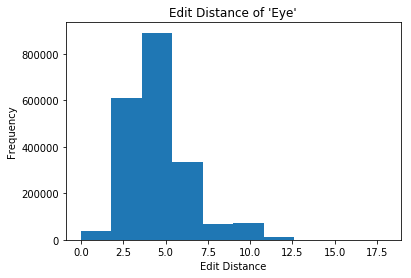

In [78]:
histogram = plt.figure

df["Edit_distance"].plot(kind='hist').set_xlabel('Edit Distance')
plt.title("Edit Distance of 'Eye'")
plt.show()

In [60]:
eye_histogram

AttributeError: 'AxesSubplot' object has no attribute 'show'